<a href="https://colab.research.google.com/github/21lahari/Neural-Language-Model-Training-PyTorch-/blob/main/nlm_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Underfitting Model**

In [3]:
!python train_lm.py --data_path dataset.txt --save_dir runs/underfit --epochs 5 \
--batch_size 64 --seq_len 20 --embed 32 --hidden 32 --nlayers 1 --dropout 0.0 --lr 5e-3 --min_freq 1

Epoch 001 | train_loss 5.4456 | val_loss 6.0838 | train_ppl 231.747 | val_ppl 438.705 | time 10.5s
Epoch 002 | train_loss 4.2617 | val_loss 6.4650 | train_ppl 70.928 | val_ppl 642.257 | time 10.2s
Epoch 003 | train_loss 3.8464 | val_loss 6.8310 | train_ppl 46.822 | val_ppl 926.155 | time 10.2s
Epoch 004 | train_loss 3.6006 | val_loss 7.2149 | train_ppl 36.621 | val_ppl 1359.507 | time 10.2s
Epoch 005 | train_loss 3.4318 | val_loss 7.6064 | train_ppl 30.931 | val_ppl 2010.988 | time 10.2s
Test loss: 6.9890 | Test perplexity: 1084.684
Saved plots and model to runs/underfit
Done.


**BESTFIT**

In [1]:
!python train_lm.py --data_path dataset.txt --save_dir runs/bestfit_quick --epochs 10 \
--batch_size 64 --seq_len 20 --embed 96 --hidden 192 --nlayers 1 --dropout 0.4 \
--lr 1e-3 --early_stop 3 --min_freq 2 --clip_grad 0.5


Epoch 001 | train_loss 5.0264 | val_loss 5.1206 | train_ppl 152.378 | val_ppl 167.444 | time 15.8s
Epoch 002 | train_loss 3.8980 | val_loss 5.2345 | train_ppl 49.303 | val_ppl 187.639 | time 15.6s
Epoch 003 | train_loss 3.3289 | val_loss 5.5202 | train_ppl 27.907 | val_ppl 249.692 | time 15.4s
Early stopping triggered.
Test loss: 5.8163 | Test perplexity: 335.722
Saved plots and model to runs/bestfit_quick
Done.


**Overfitting**

In [10]:
!python train_lm.py --data_path dataset.txt --save_dir runs/overfit --epochs 3 --batch_size 8 --seq_len 25 --embed 128 --hidden 256 --nlayers 2 --dropout 0.0 --lr 0.001


Epoch 001 | train_loss 3.7547 | val_loss 8.1126 | train_ppl 42.720 | val_ppl 3336.105 | time 93.0s
Epoch 002 | train_loss 1.0299 | val_loss 10.5051 | train_ppl 2.801 | val_ppl 36502.872 | time 93.3s
Epoch 003 | train_loss 0.5517 | val_loss 11.7435 | train_ppl 1.736 | val_ppl 125930.991 | time 94.0s
Test loss: 9.7865 | Test perplexity: 17791.660
Saved plots and model to runs/overfit
Done.


**OUTPUT GRAPHS**

Saved all_three_loss_curves.png


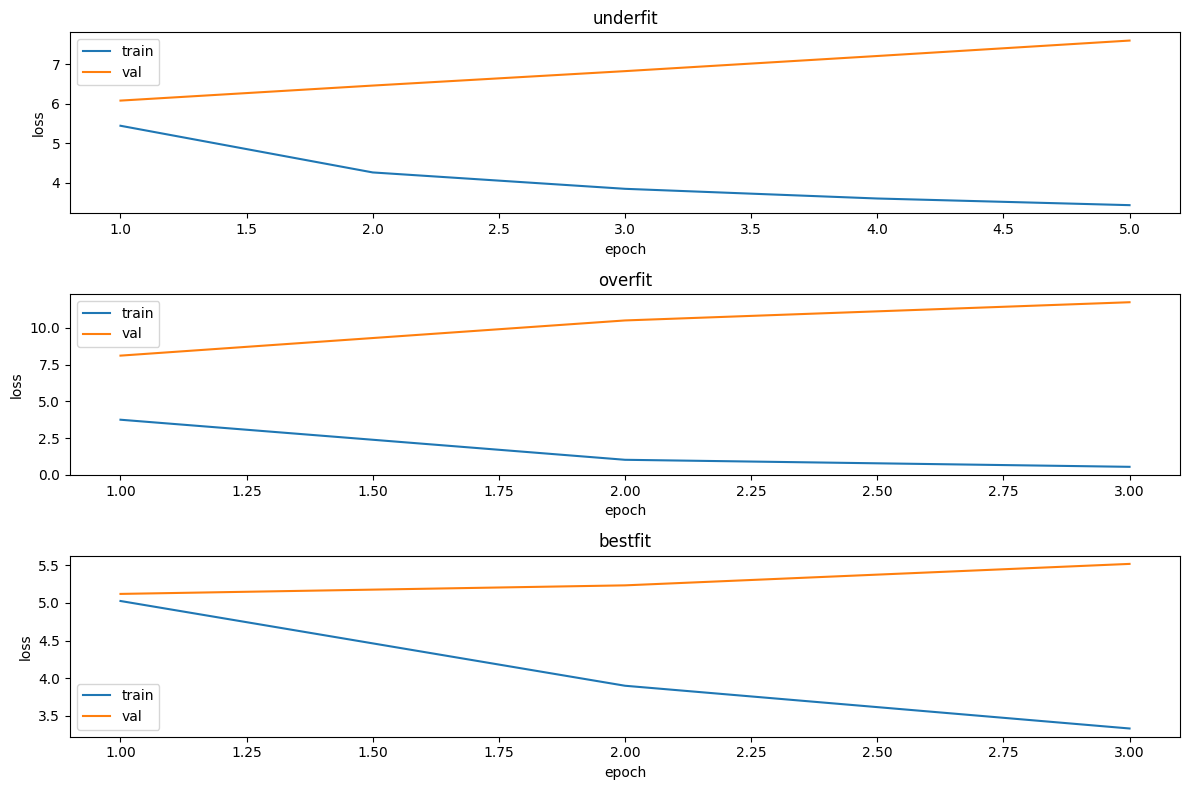

In [13]:
# plot_all_runs.py
import json, os
import matplotlib.pyplot as plt

runs = {
    "underfit": "runs/underfit/results.json",
    "overfit": "runs/overfit/results.json",
    "bestfit": "runs/bestfit_quick/results.json"
}

plt.figure(figsize=(12,8))

for i,(name,path) in enumerate(runs.items(),1):
    if not os.path.exists(path):
        print("Missing:", path)
        continue
    with open(path) as f:
        r = json.load(f)
    train = r.get("train_loss", [])
    val = r.get("val_loss", [])
    epochs = list(range(1, 1+max(len(train), len(val))))
    plt.subplot(3,1,i)
    if train: plt.plot(range(1,1+len(train)), train, label="train")
    if val: plt.plot(range(1,1+len(val)), val, label="val")
    plt.title(name)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
plt.tight_layout()
plt.savefig("all_three_loss_curves.png", dpi=200)
print("Saved all_three_loss_curves.png")


**COMPARISION TABLE**

In [18]:
import pandas as pd
import json, os
from IPython.display import display, HTML

# --- Load results from JSON files ---
runs_data = {
    "underfit": "runs/underfit/results.json",
    "overfit": "runs/overfit/results.json",
    "bestfit": "runs/bestfit_quick/results.json"
}

results = []
for name, path in runs_data.items():
    if os.path.exists(path):
        with open(path) as f:
            r = json.load(f)
        results.append({
            "Model": name,
            "Test Loss": r.get("test_loss"),
            "Test Perplexity": r.get("test_ppl")
        })
    else:
        results.append({
            "Model": name,
            "Test Loss": None,
            "Test Perplexity": None
        })

# --- Convert to DataFrame ---
df = pd.DataFrame(results)

# --- Style the table ---
styled = df.style.set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "white")]},
    {"selector": "td", "props": [("padding", "5px")]}
]).set_properties(**{"border": "1px solid black"})

display(styled)

# --- Determine BEST model automatically ---
valid_rows = df.dropna()

if not valid_rows.empty:
    best_row = valid_rows.loc[valid_rows["Test Perplexity"].idxmin()]
    best_model = best_row["Model"]
    best_loss = best_row["Test Loss"]
    best_ppl = best_row["Test Perplexity"]

    print("\n📌 BEST MODEL RESULTS")
    print("------------------------------")
    print(f"Best Model: {best_model}")
    print(f"Test Loss: {best_loss}")
    print(f"Test Perplexity: {best_ppl}")

    print("\n✅ Why this is the best model?")
    print(f"- It has the LOWEST test perplexity ({best_ppl}), which means it generalizes best.")
    print("- Lower perplexity = better predictions on unseen data.")
    print("- Therefore, this model is neither underfitting nor overfitting.")
else:
    print("No valid results found.")


,Model,Test Loss,Test Perplexity
0,underfit,6.989044,1084.683509
1,overfit,9.786485,17791.660309
2,bestfit,5.816284,335.722240



📌 BEST MODEL RESULTS
------------------------------
Best Model: bestfit
Test Loss: 5.816284150593169
Test Perplexity: 335.72223972267506

✅ Why this is the best model?
- It has the LOWEST test perplexity (335.72223972267506), which means it generalizes best.
- Lower perplexity = better predictions on unseen data.
- Therefore, this model is neither underfitting nor overfitting.
